# About - Dataset:

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes

# Title: Bike Details Dataset

Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market

# Title: Bike Details Dataset


- =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")

- selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)

- year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)

- seller_type: Seller category, either "Individual" or "Dealer" (Categorical)

- owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)

- km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)

- ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

# Questions:

1. What is the range of selling prices in the dataset
2. What is the median selling price for bikes in the dataset
3. What is the most common seller type
4. How many bikes have driven more than 50,000 kilometers
5. What is the average km_driven value for each ownership type
6. What proportion of bikes are from the year 2015 or older
7. What is the trend of missing values across the dataset
8. What is the highest ex_showroom_price recorded, and for which bike
9. What is the total number of bikes listed by each seller type
10. What is the relationship between selling_price and km_driven for first-owner bikes
11. dentify and remove outliers in the km_driven column using the IQR method
12. Perform a bivariate analysis to visualize the relationship between year and selling_price
13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)
14. Which bike names are priced significantly above the average price for their manufacturing year
15. Develop a correlation matrix for numeric columns and visualize it using a heatmap

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('/content/BIKE DETAILS.csv')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [97]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [98]:
range = df.selling_price.max() - df.selling_price.min()
print(f'The range of selling prices in the dataset is {range}')

The range of selling prices in the dataset is 755000


In [99]:
meadian = df.selling_price.median()
print(f'The median selling price for bikes in the dataset is {meadian}')

The median selling price for bikes in the dataset is 45000.0


In [100]:
# most common seller type :
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [101]:
#  bikes have driven more than 50,000 kilometers
more_driven = (df.km_driven > 50000).sum()
print(more_driven)

170


In [102]:
df.owner.value_counts()

,count
owner,
1st owner,924
2nd owner,123
3rd owner,11
4th owner,3


In [103]:
# average km_driven value for each ownership type
first_owner = df[df['owner'] == '1st owner']['km_driven'].mean()
sec_owner = df[df["owner"] == '2nd owner']['km_driven'].mean()
third_owner = df[df["owner"] == '3rd owner']['km_driven'].mean()
fourth_owner = df[df["owner"] == '4th owner']['km_driven'].mean()

print(f"1st owner: {first_owner}")
print(f"2nd owner: {sec_owner}")
print(f"3rd owner: {third_owner}")
print(f"4th owner: {fourth_owner}")

1st owner: 32816.583333333336
2nd owner: 39288.9918699187
3rd owner: 33292.181818181816
4th owner: 311500.0


In [104]:
# proportion of bikes are from the year 2015 or older
older_bike = (df.year >= 2015).sum()
total = len(df)
proportion = older_bike / total
print(f'The proportion of bikes are from the year 2015 or older is {proportion}')

The proportion of bikes are from the year 2015 or older is 0.527803958529689


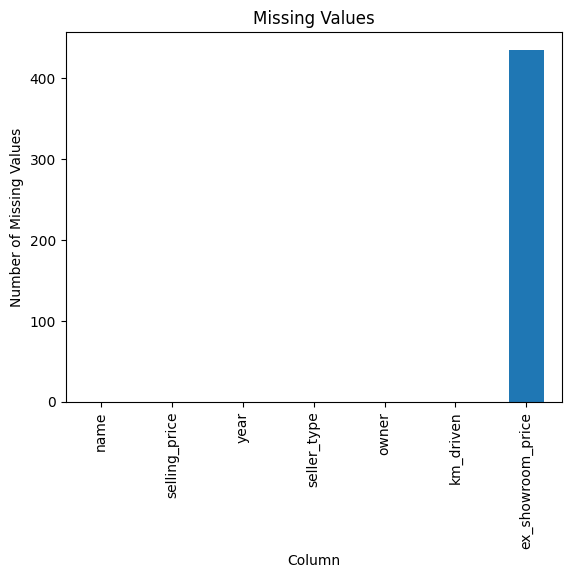

In [105]:
# trend of missing values across the dataset
missing_values = df.isnull().sum()
missing_values.plot(kind='bar', title='Missing Values')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values');


In [106]:
# highest ex_showroom_price recorded, and for which bike
highest_price = df.ex_showroom_price.max()
highest_price_bike = df[df.ex_showroom_price == highest_price]
print(f'The highest ex_showroom_price recorded is {highest_price}')
print('The bike with the highest ex_showroom_price is:',highest_price_bike.name)

The highest ex_showroom_price recorded is 1278000.0
The bike with the highest ex_showroom_price is: 134    Harley-Davidson Street Bob
Name: name, dtype: object


In [107]:
# total number of bikes listed by each seller type
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


Correlation: -0.2129367071445366


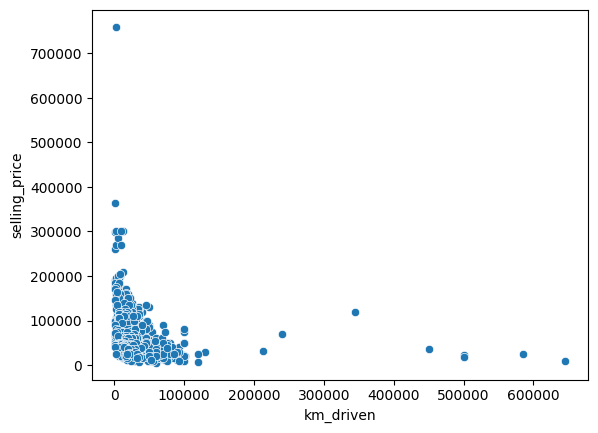

In [108]:
# relationship between selling_price and km_driven for first-owner bikes
sns.scatterplot(data = df[df['owner'] == '1st owner'], x = 'km_driven', y = 'selling_price');

# Calculate the correlation between km_driven and selling_price using the DataFrame 'df'
correlation = df['km_driven'].corr(df['selling_price'])  # Changed 'data' to 'df'
print(f"Correlation: {correlation}")

In [109]:
# identify and remove outliers in the km_driven column using the IQR methodD

# IQR for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

# Remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Shape of the cleaned DataFrame: {df_cleaned.shape}")



Number of outliers: 39
Shape of the cleaned DataFrame: (1022, 7)


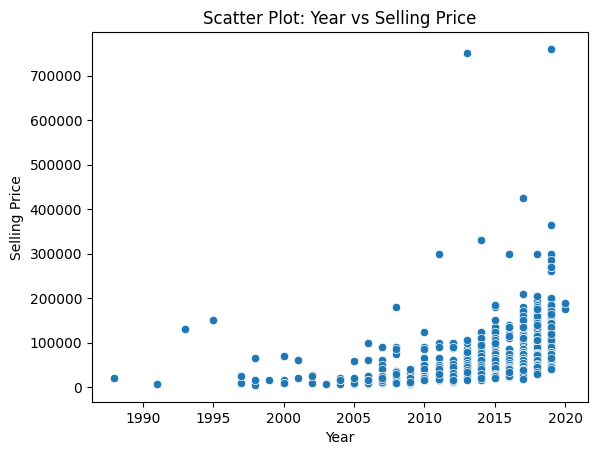

In [110]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price

sns.scatterplot(data=df, x = 'year', y = 'selling_price')
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price');

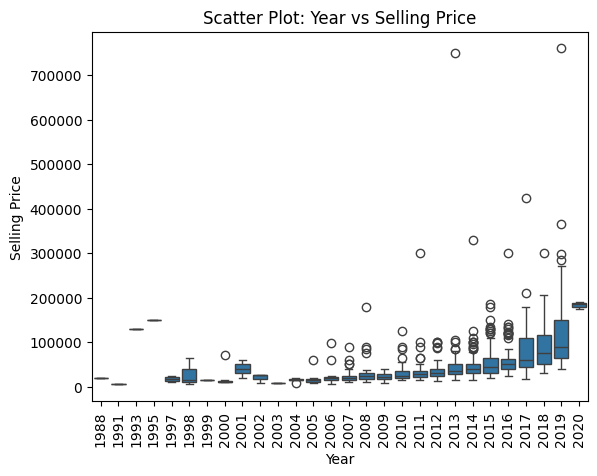

In [111]:
sns.boxplot(data=df, x = 'year', y = 'selling_price')
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=90);

In [112]:
# average depreciation in selling price based on the bike's age (current year -manufacturing year)

import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of each bike
bike_age = current_year - df['year']

# Calculate depreciation for each bike
depreciation = df['selling_price'] / bike_age

# Calculate the average depreciation
average_depreciation = depreciation.mean()

print(f"Average depreciation in selling price per year: {average_depreciation:.2f}")


Average depreciation in selling price per year: 8036.51


In [118]:
# Which bike names are priced significantly above the average price for their manufacturing year

# Calculate the average price for each manufacturing year
yearly_avg_price = df.groupby('year')['selling_price'].mean()

# Identify bikes priced significantly above the average
significantly_priced_bikes = df[df.apply(lambda row: row['selling_price'] > 1.5 * yearly_avg_price[row['year']], axis=1)]

# Display bike names and relevant details
print(significantly_priced_bikes[['name']])


                                     name
2     Royal Enfield Classic Gunmetal Grey
7    Royal Enfield Bullet 350 [2007-2011]
13                          Yamaha YZF R3
18    Royal Enfield Classic Gunmetal Grey
23                          Jawa Standard
..                                    ...
979             Royal Enfield Thunder 500
981             Royal Enfield Thunder 350
983             Royal Enfield Classic 350
984             Royal Enfield Classic 500
985             Royal Enfield Classic 500

[157 rows x 1 columns]


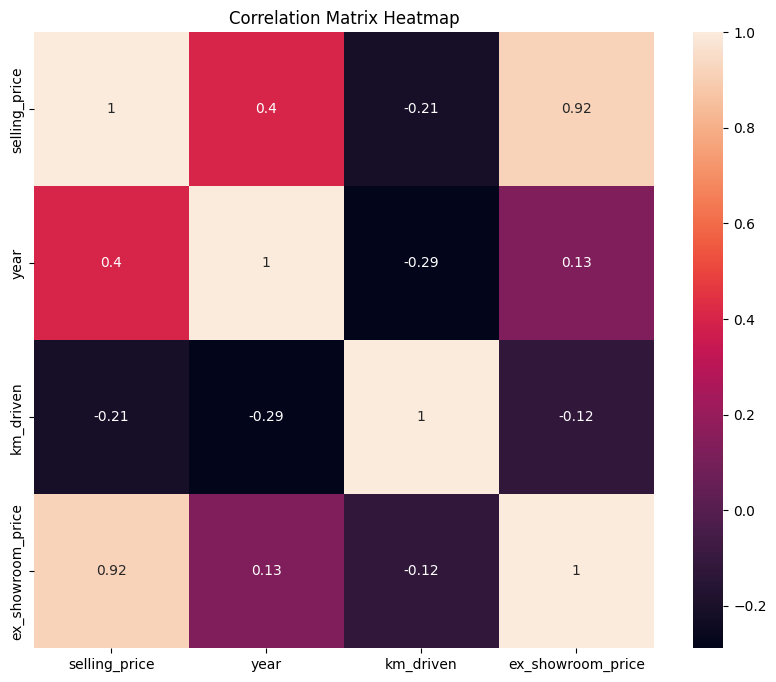

In [123]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap

numeric = df.select_dtypes(include= np.number)

# Calculate the correlation matrix
correlation_matrix = numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap');